## 모델 불러오기

In [2]:
## 라이브러리 설치
##pip install trimesh

In [3]:
import trimesh

In [4]:
model = trimesh.load('./obj/model.stl')

In [5]:
model.show()

In [6]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
# model.merge_vertices()

In [7]:
## 변수에 저장
vertices = model.vertices

## 샘플 추출

https://trimesh.org/trimesh.sample.html

## 시각화

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

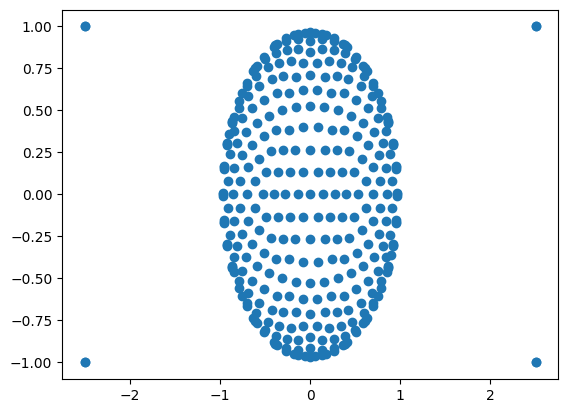

In [9]:
plt.scatter(vertices[:,0], vertices[:,1])

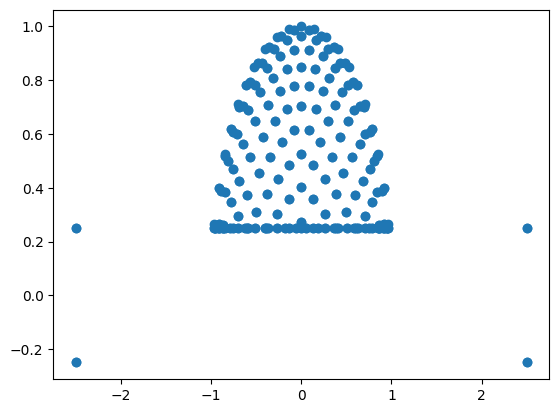

In [10]:
plt.scatter(vertices[:,0], vertices[:,2])

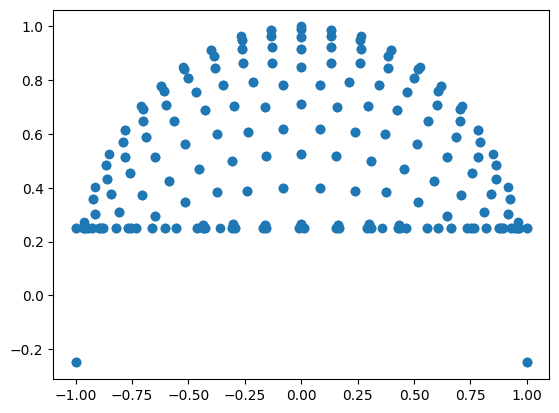

In [11]:
plt.scatter(vertices[:,1], vertices[:,2])

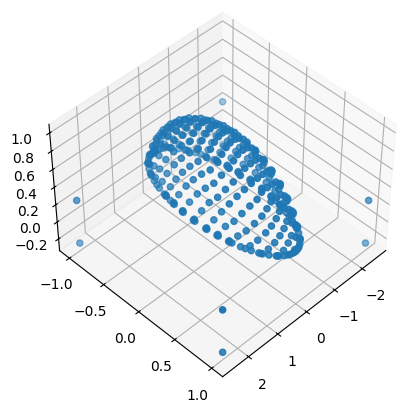

In [12]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])

In [13]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 300)
points = samples[0]
points

TrackedArray([[ 1.06889839e+00, -2.93967871e-02,  2.50000000e-01],
              [-1.52257169e+00, -7.13322372e-01,  2.50000000e-01],
              [ 6.40803986e-01, -6.73491986e-02,  7.61854355e-01],
              [ 1.02815370e+00, -1.07938696e-01, -2.50000000e-01],
              [ 1.80467400e+00,  1.00000000e+00,  2.47285480e-01],
              [ 7.37891120e-01, -6.04858930e-01, -2.50000000e-01],
              [-1.43672990e+00,  6.91869355e-02,  2.50000000e-01],
              [ 1.41233670e+00,  1.00000000e+00,  2.24393465e-02],
              [-6.40863468e-01, -2.43667765e-01, -2.50000000e-01],
              [ 1.62339981e+00, -1.00000000e+00, -8.39166094e-03],
              [-2.24809322e+00,  7.27627788e-01,  2.50000000e-01],
              [ 1.49145807e+00, -8.56468887e-01,  2.50000000e-01],
              [-4.18285247e-01, -8.04285524e-01, -2.50000000e-01],
              [-2.41915400e+00,  1.00000000e+00,  1.91563312e-01],
              [-1.15875911e+00, -3.27887322e-01,  2.50000000e-

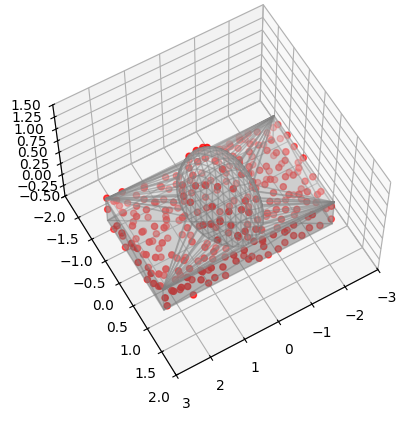

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=60, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

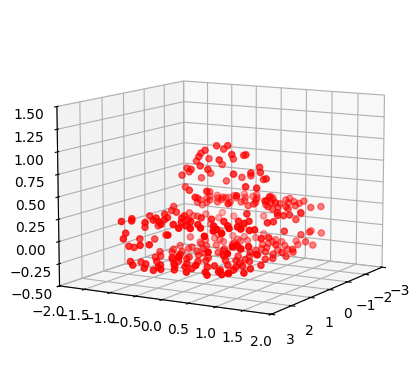

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(points)

In [18]:
df

,0,1,2
0,1.068898,-0.029397,0.250000
1,-1.522572,-0.713322,0.250000
2,0.640804,-0.067349,0.761854
3,1.028154,-0.107939,-0.250000
4,1.804674,1.000000,0.247285
...,...,...,...
295,-1.316830,0.708872,0.250000
296,-0.807569,0.037210,0.583528
297,-1.235027,0.111229,0.250000
298,-1.348431,-0.869603,0.250000


In [19]:
df.to_csv("points.csv", index=False)

In [20]:
dens = open("../R/density.csv")